In [9]:
%load_ext autoreload

%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from plot_images import plot_images
from tools import load_json, read_yaml_config
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Config params


In [20]:
config_file_path = 'configs/config.yaml'
species = 'whaleshark'
config = read_yaml_config(config_file_path, species)
print(config)

anno_path = config["preprocessed_annotation_path"]

images_dir = config["images_dir"]


{'data_dir': '/home/kate/data/coco_whaleshark/coco', 'export_dir': '/home/kate/data/coco_whaleshark/coco/split', 'images_dir': '/home/kate/data/coco_whaleshark/coco/images/test2023', 'raw_annotation_path': '/home/kate/data/coco_whaleshark/coco/annotations/instances_test2023.json', 'preprocessed_annotation_path': '/home/kate/data/coco_whaleshark/coco/preprocessed/whaleshark.json', 'excluded_viewpoints': ['front', 'back', 'up', 'down'], 'csv_dir': '/home/kate/data/coco_whaleshark/coco/csvs'}


### Load data

In [26]:
data = load_json(anno_path)
dfa = pd.DataFrame(data['annotations'])
dfi = pd.DataFrame(data['images'])
dfc = pd.DataFrame(data['categories'])
dfn = pd.DataFrame(data['individuals'])


df = dfa.merge(dfi, left_on='image_uuid', right_on='uuid')
df = df.merge(dfc, left_on='category_id', right_on='id')
df = df.merge(dfn, left_on='individual_uuid', right_on='uuid')



assert not df.astype(str).duplicated().any()

counts = df.groupby('viewpoint').size()
print(counts)


df['path'] = df['file_name'].apply(lambda x: os.path.join(images_dir, x))

assert df['path'].apply(os.path.exists).all()

viewpoint
left     4501
right    2789
dtype: int64


### Visualize

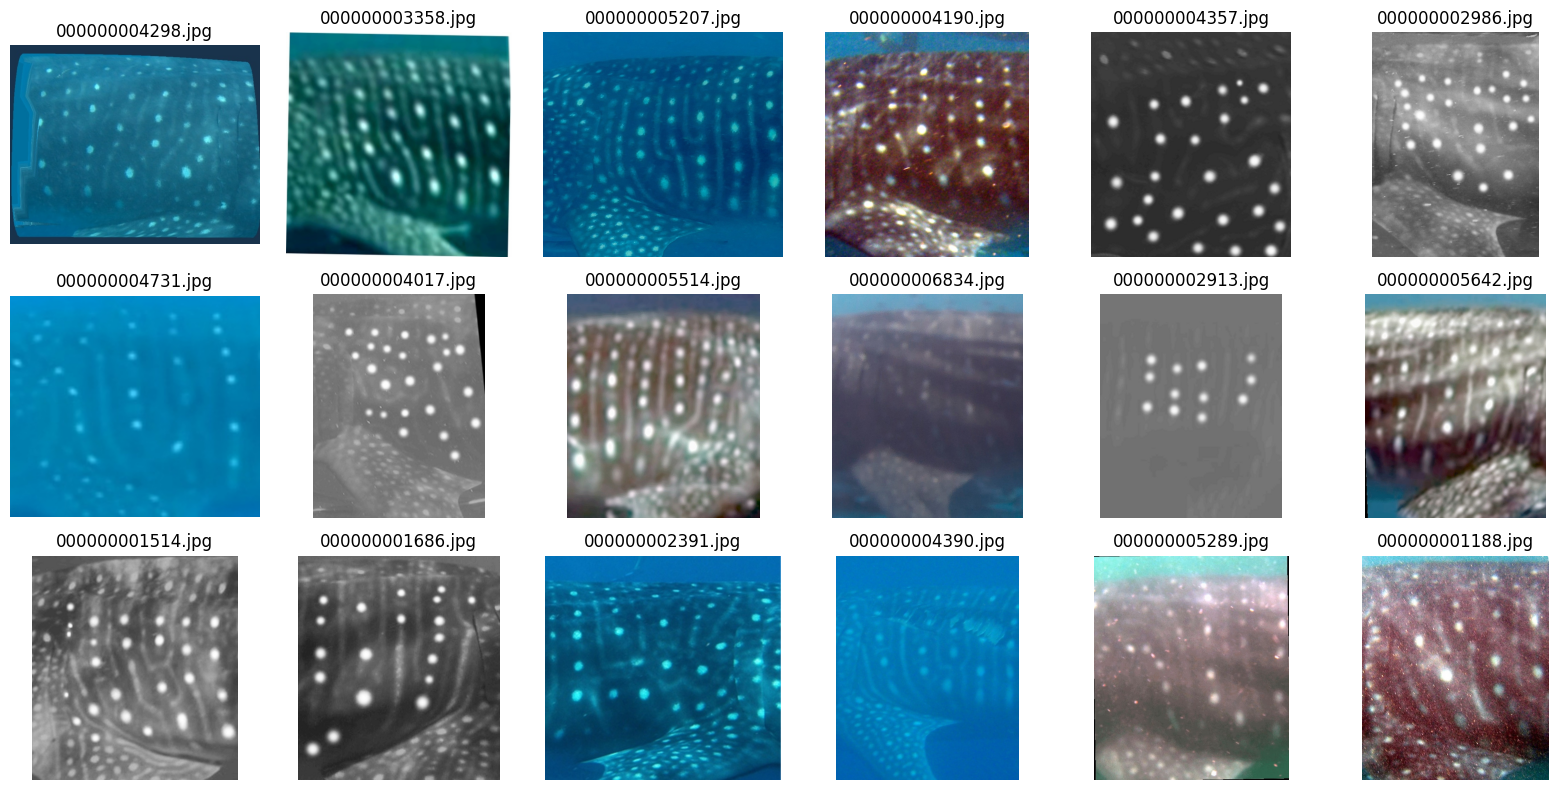

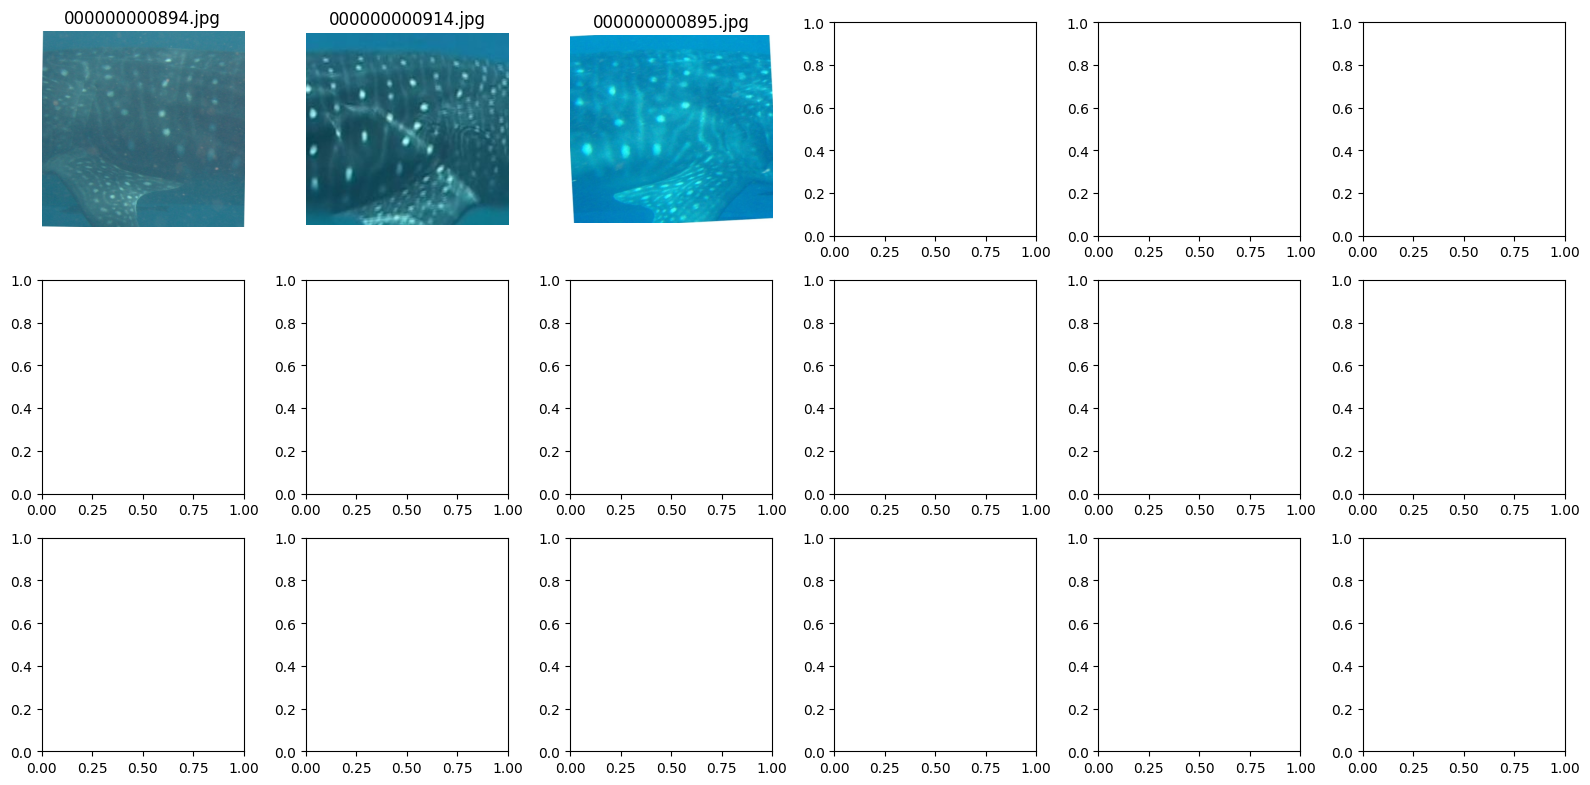

Filter value: A-506
Length: 24


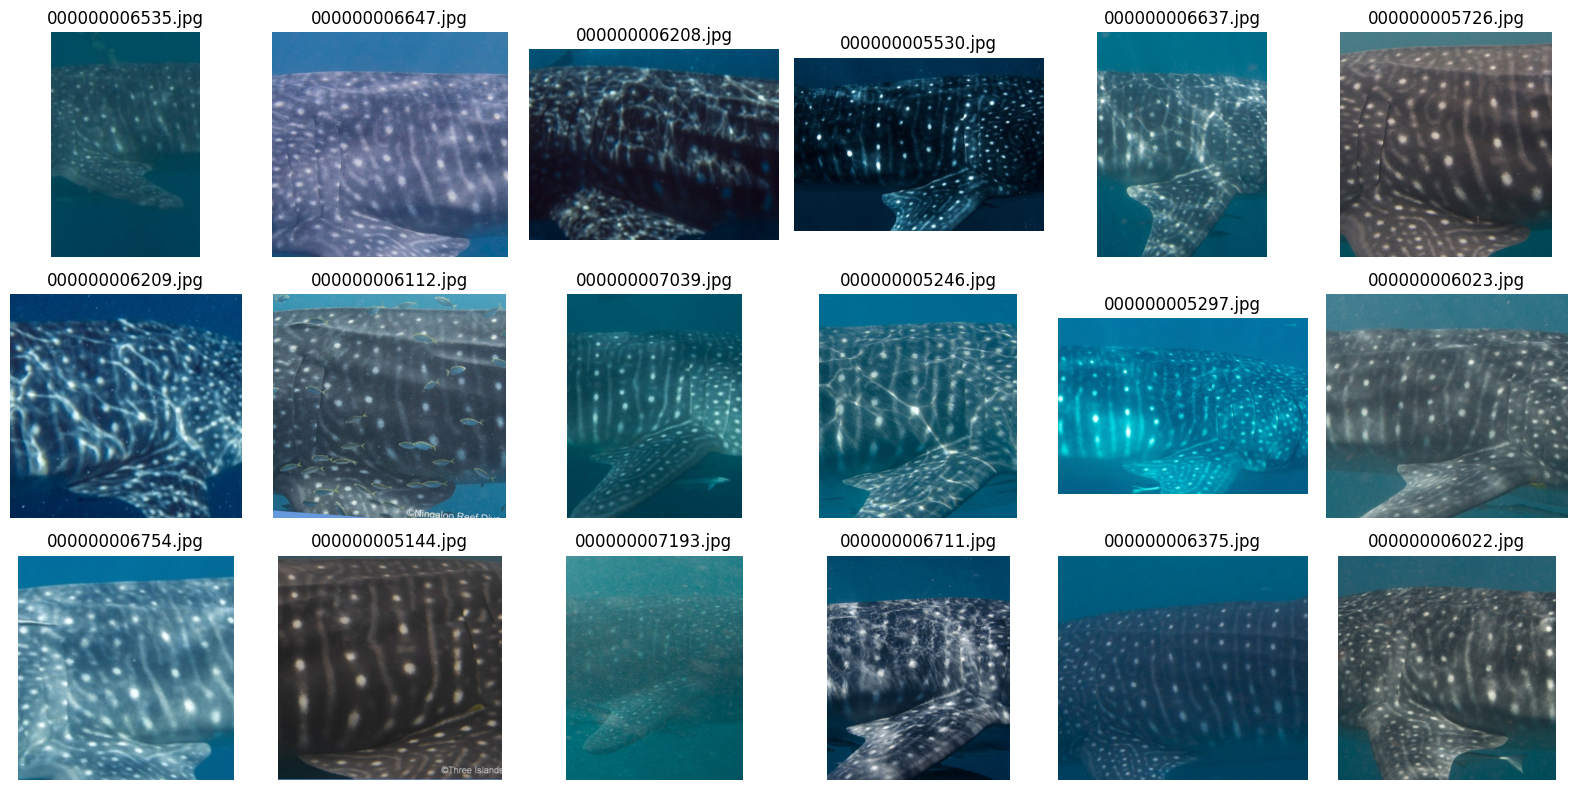

In [28]:
for species in df['species'].unique():
    plot_images(df, species=species, crop_bbox=True)



random_class = df["name"].sample().values[0]
plot_images(df, species=df['species'].unique()[0], filter_key="name", filter_value=random_class, crop_bbox=True)